Import needed libraries.

In [26]:
import geopandas as gpd
from matplotlib import pyplot as plt

Configure the 'matplotlib' charting library.

In [27]:
%matplotlib inline

Read in county shapefile. (This is very similar to other pandas imports.)

In [28]:
counties = gpd.read_file(
    "../source_data/counties_simple/counties_simple.shp"
)

Take a look at the first couple rows:

In [29]:
counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.041 -328619.667, 246286.510 -..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-1770686.984 398793.664, -1771124.91..."


Make our first map to see all the counties:

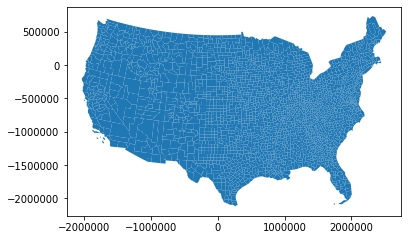

In [30]:
counties.plot()

Adjust map styles to fit your preferences.

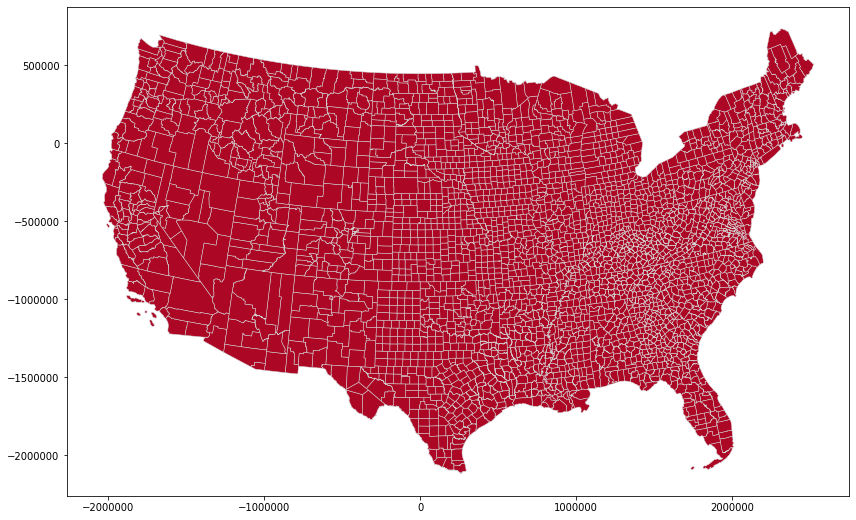

In [31]:
counties.plot(
    figsize = (16, 9),  # A tuple giving width and height in INCHES (I know, that's dumb).
    color = "#AC0825",
    edgecolor = "lightgray",
    linewidth = 0.5,
)

Remove the axis box, to make things look cleaner.

(-2265298.642771699, 2749841.931116095, -2259467.945392228, 874850.98627317)

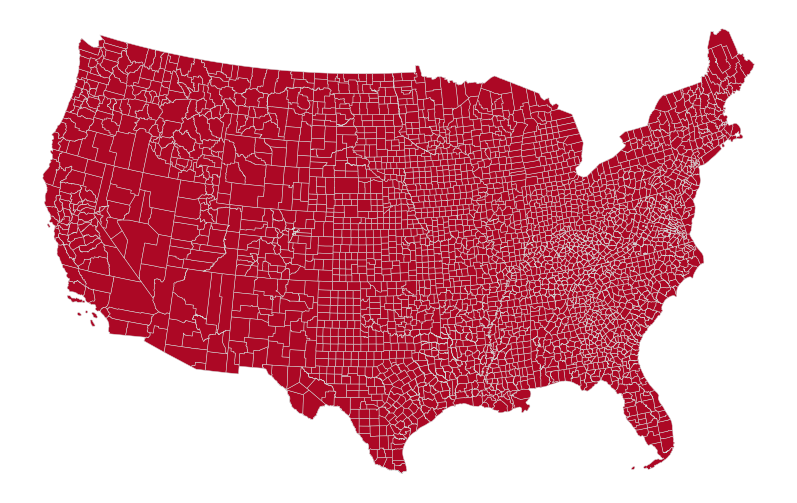

In [32]:
ax = counties.plot(
    figsize = (16, 9),
    color = "#AC0825",
    edgecolor = "lightgray",
    linewidth = 0.5,
)

ax.axis("off")

Choropleths are easy to draw, if the column you want to plot is:

 1. in your DataFrame, and
 2. a numeric value.
 
Let's see what we can map in this DataFrame.

In [33]:
counties.dtypes  # FYI, pandas lists strings as type 'object'.

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
NAME          object
NAMELSAD      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

We could choose either `ALAND` or `AWATER` as the column to map.

Let's use `ALAND` (land area), as it'll make bigger counties a darker shade.

(-2265298.642771699, 2749841.931116095, -2259467.945392228, 874850.98627317)

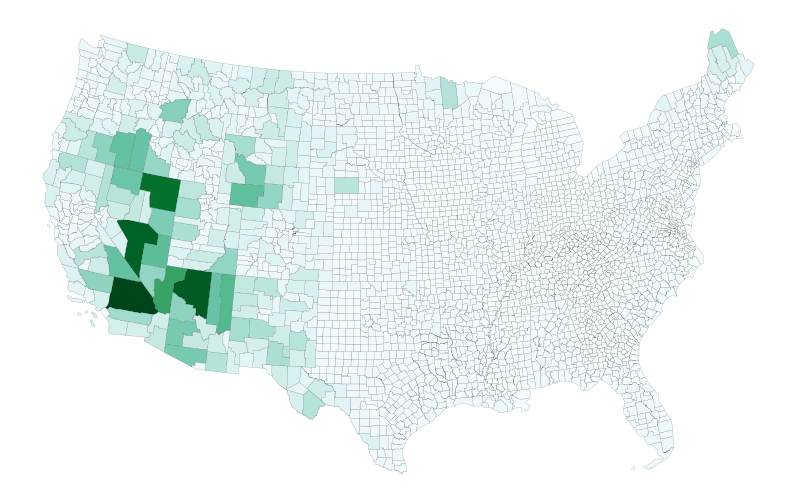

In [34]:
ax = counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn",  # More choices here: https://matplotlib.org/users/colormaps.html.
    edgecolor = "black",
    linewidth = 0.1,
)

ax.axis("off")

Great! Now let's add a legend.

(-2265298.642771699, 2749841.931116095, -2259467.945392228, 874850.98627317)

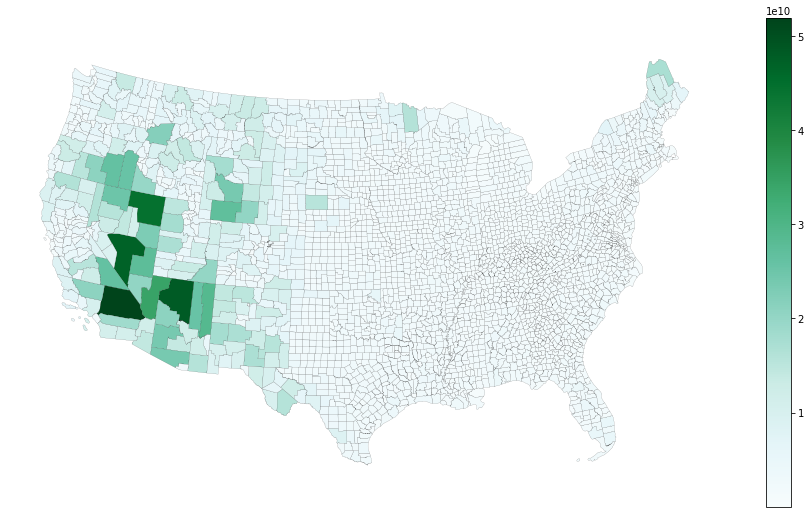

In [35]:
ax = counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn",
    edgecolor = "black",
    linewidth = 0.1,
    legend = True,
)

ax.axis("off")

Let's reformat the legend to have useful increments.

Text(0.5, 1, 'Square Kilometers\n(Millions)')

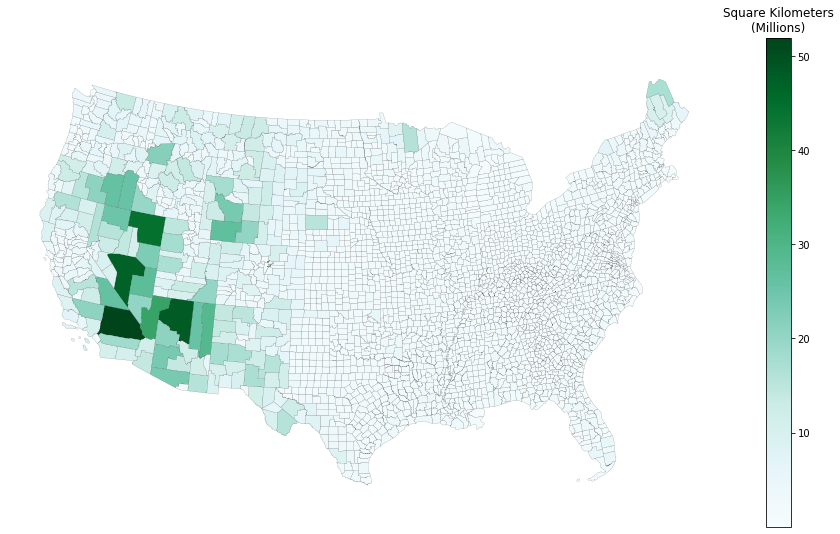

In [36]:
ax = counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn",
    edgecolor = "black",
    linewidth = 0.1,
    legend = True,
)

ax.axis("off")


# The color bar is an axis added to the figure when you do Legend = True.
# Access it by simply iterating through the axes
colorbar = ax.get_figure().get_axes()[1]

# This will return an Array of yticks. Treat it like a list.
yticks = colorbar.get_yticks()

# Using string formatting. Adds commas and removes trailing zeros
colorbar.set_yticklabels(['{0:,.0f}'.format(ytick/1000000000) for ytick in yticks])

# Now, title your axis.
colorbar.set_title("Square Kilometers\n(Millions)")

Now, add a title and get your map ready to be exported.

Text(0.5, 1, 'Counties by land area')

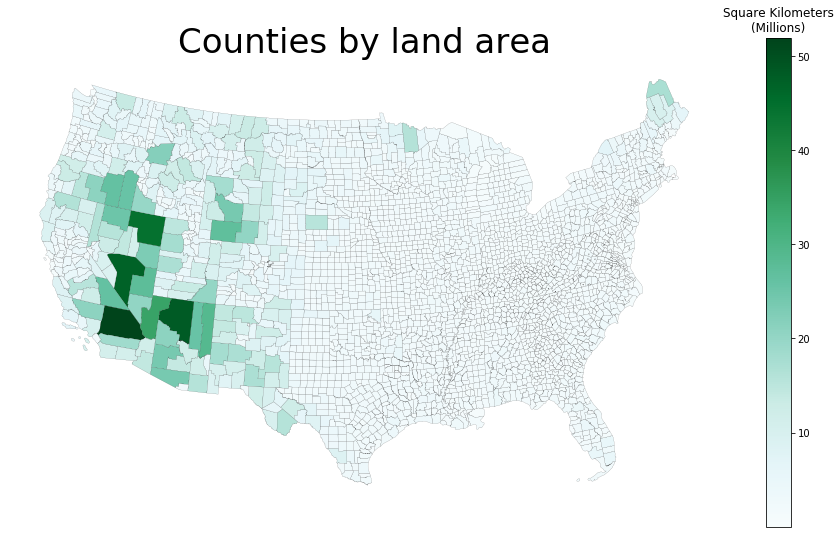

In [37]:
fig, ax = plt.subplots(
    figsize = (16, 9),
)

counties.plot(
    ax = ax,
    column = "ALAND",
    cmap = "BuGn",
    edgecolor = "black",
    linewidth = 0.1,
    legend = True,
)

ax.axis("off")

colorbar = ax.get_figure().get_axes()[1]

yticks = colorbar.get_yticks()

colorbar.set_yticklabels(['{0:,.0f}'.format(ytick/1000000000) for ytick in yticks])

colorbar.set_title("Square Kilometers\n(Millions)")

ax.set_title("Counties by land area", fontsize = 34)

Finally, save your chart as an image.

In [38]:
fig.savefig(
    "../output-images/01__county-land-area.png", 
    transparent = False,
    bbox_inches = "tight"
)